In [6]:
import subprocess
open('time_result.json', 'w').close()
def run_cpp_executable(executable_path, args):
  """
  Runs the specified C++ executable with the given arguments.

  Args:
    executable_path: Path to the executable file.
    args: List of arguments to pass to the executable.

  Returns:
    The output of the executable as a string.
  """
  try:
    result = subprocess.run([executable_path] + args, 
                           stdout=subprocess.PIPE, 
                           stderr=subprocess.PIPE, 
                           check=True,
                           text=True)
    return result.stdout
  except subprocess.CalledProcessError as e:
    print(f"Error executing {executable_path}: {e}")
    return ""

# Example usage:
executable_path = "./x64/Release/DWTSVD_Watermarking.exe"  
#<original_image_path> <watermark_image_path> <watermark_width> <watermark_height> <type> <loop_number>
#For type: 0 = Serial, 1 = OMP, 2 = CUDA, 3 = MPI
args = ["home.jpg", "mono.png", "64", "64", "0", "3"] 

output = run_cpp_executable(executable_path, args)
print(output) 
args = ["home.jpg", "mono.png", "64", "64", "2", "3"] 

output = run_cpp_executable(executable_path, args)
print(output) 

Sequential PSNR embedding : 45.5908
Loop 1 Serial execution time: 3624ms
Sequential PSNR embedding : 45.7861
Loop 2 Serial execution time: 4499ms
Sequential PSNR embedding : 45.6276
Loop 3 Serial execution time: 5703ms

Serial Average execution time: 4608.67ms. 
New record has been appended to time_result.json

CUDA PSNR embedding : 45.433
Loop 1 CUDA execution time: 503ms
CUDA PSNR embedding : 45.433
Loop 2 CUDA execution time: 339ms
CUDA PSNR embedding : 45.433
Loop 3 CUDA execution time: 146ms

CUDA Average execution time: 329.333ms. 
New record has been appended to time_result.json



Error loading image from ./omp_watermarked_image.tiff: Could not load image from ./omp_watermarked_image.tiff
Error loading image from ./mpi_watermarked_image.tiff: Could not load image from ./mpi_watermarked_image.tiff


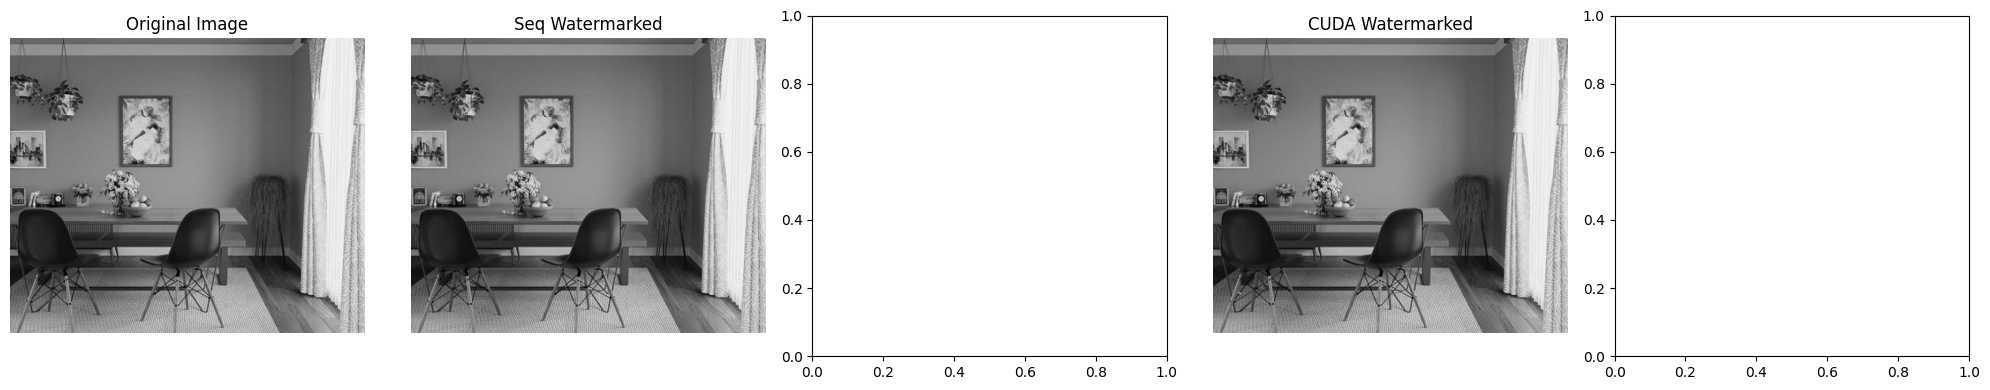

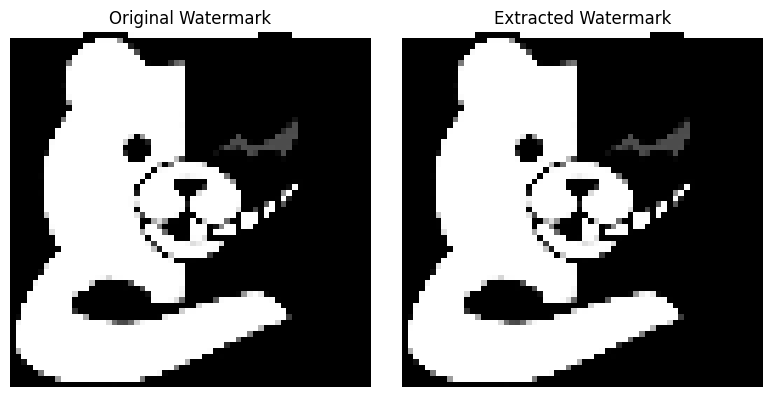

C:\Users\gogo2\AppData\Local\Temp\ipykernel_8020\2526321784.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


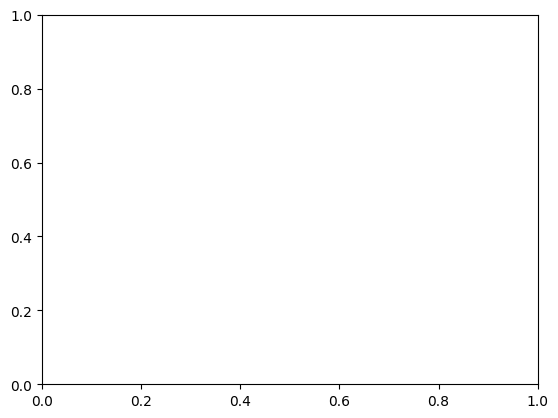

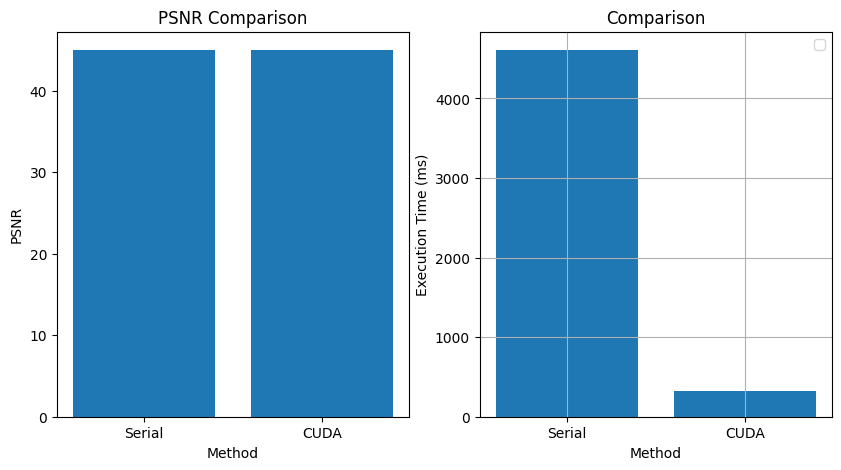

In [17]:
import cv2  # Assuming you're using OpenCV for image loading
import matplotlib.pyplot as plt
import json
import numpy as np

def show_multiple_images(image_paths, titles=None):

  num_images = len(image_paths)
  fig, axes = plt.subplots(1, num_images, figsize=(num_images * 4, 4))  

  if titles is None:
    titles = [f"Image {i+1}" for i in range(num_images)]

  for i, (image_path, title) in enumerate(zip(image_paths, titles)):
    try:
      img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
      if img is None:
        raise ValueError(f"Could not load image from {image_path}")
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
      axes[i].imshow(img)
      axes[i].set_title(title)
      axes[i].axis('off')
    except (ValueError, cv2.error) as e:
      print(f"Error loading image from {image_path}: {e}")

  plt.tight_layout()
  plt.show()

def plot_comparison(data):
    # Define the desired order of methods
    ordered_methods = ['seq', 'omp', 'mpi','cuda'] 
    # Extract data in the desired order
    methods = [method for method in ordered_methods if method in data] 
    embed_times = [data[method]['embed_time'] for method in methods]
    extract_times = [data[method]['extract_time'] for method in methods]
    psnrs = [data[method]['psnr'] for method in methods]

    x = np.arange(len(methods))

    fig, ax1 = plt.subplots()

    methods = [d["method"] for d in data]
    psnrs = [d["psnr"] for d in data]
    times = [d["time"] for d in data]

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot PSNR comparison
    axs[0].bar(methods, psnrs)
    axs[0].set_xlabel("Method")
    axs[0].set_ylabel("PSNR")
    axs[0].set_title("PSNR Comparison")

    # Plot execution time comparison
    axs[1].bar(methods, times)
    axs[1].set_xlabel("Method")
    axs[1].set_ylabel("Execution Time (ms)")
    axs[1].set_title("Execution Time Comparison")

    plt.title('Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

image_paths = [
    "./resized_home.jpg", 
    "./serial_watermarked_image.tiff", 
    "./omp_watermarked_image.tiff", 
    "./cuda_watermarked_image.tiff",
    "./mpi_watermarked_image.tiff"
]
titles = ["Original Image", "Seq Watermarked", "OMP Watermarked", "CUDA Watermarked", "MPI Watermarked"] 

show_multiple_images(image_paths, titles) 

image_paths = [
    "./cuda_watermarked_image_actualwatermark.tiff", 
    "./extracted_watermark.png"
]
titles = ["Original Watermark", "Extracted Watermark"] 
show_multiple_images(image_paths, titles) 

# Load data from JSON file
with open('time_result.json', 'r') as f:
    data = json.load(f)

# Plot the comparison
plot_comparison(data) 